# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [195]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, classification_report
from sklearn.decomposition import PCA

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [196]:
df = pd.read_csv("https://raw.githubusercontent.com/faarismuda/Clustering-Cancer/main/Dataset/pancreatic_cancer.csv")

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [197]:
# Melihat informasi umum
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Country                        50000 non-null  object
 1   Age                            50000 non-null  int64 
 2   Gender                         50000 non-null  object
 3   Smoking_History                50000 non-null  int64 
 4   Obesity                        50000 non-null  int64 
 5   Diabetes                       50000 non-null  int64 
 6   Chronic_Pancreatitis           50000 non-null  int64 
 7   Family_History                 50000 non-null  int64 
 8   Hereditary_Condition           50000 non-null  int64 
 9   Jaundice                       50000 non-null  int64 
 10  Abdominal_Discomfort           50000 non-null  int64 
 11  Back_Pain                      50000 non-null  int64 
 12  Weight_Loss                    50000 non-null 

In [198]:
# Memeriksa nilai yang hilang
print("\nJumlah Nilai yang Hilang per Kolom:")
print(df.isnull().sum())


Jumlah Nilai yang Hilang per Kolom:
Country                          0
Age                              0
Gender                           0
Smoking_History                  0
Obesity                          0
Diabetes                         0
Chronic_Pancreatitis             0
Family_History                   0
Hereditary_Condition             0
Jaundice                         0
Abdominal_Discomfort             0
Back_Pain                        0
Weight_Loss                      0
Development_of_Type2_Diabetes    0
Stage_at_Diagnosis               0
Survival_Time_Months             0
Treatment_Type                   0
Survival_Status                  0
Alcohol_Consumption              0
Physical_Activity_Level          0
Diet_Processed_Food              0
Access_to_Healthcare             0
Urban_vs_Rural                   0
Economic_Status                  0
dtype: int64


In [199]:
# Menampilkan 5 row pertama
df.head()

,Country,Age,Gender,Smoking_History,Obesity,Diabetes,Chronic_Pancreatitis,Family_History,Hereditary_Condition,Jaundice,...,Stage_at_Diagnosis,Survival_Time_Months,Treatment_Type,Survival_Status,Alcohol_Consumption,Physical_Activity_Level,Diet_Processed_Food,Access_to_Healthcare,Urban_vs_Rural,Economic_Status
0,Canada,64,Female,0,0,0,0,0,0,0,...,Stage III,13,Surgery,0,0,Medium,Low,High,Urban,Low
1,South Africa,77,Male,1,1,0,0,0,0,0,...,Stage III,13,Chemotherapy,0,1,Medium,Medium,Medium,Urban,Low
2,India,71,Female,0,0,0,0,0,0,0,...,Stage IV,3,Chemotherapy,1,0,Medium,High,Low,Rural,Middle
3,Germany,56,Male,0,0,0,0,1,0,1,...,Stage IV,6,Radiation,0,1,Low,Low,Medium,Rural,Middle
4,United States,82,Female,0,0,0,0,1,0,0,...,Stage IV,9,Chemotherapy,1,0,Low,Medium,Medium,Rural,Low


In [200]:
# Statistik Deskriptif
print("\nStatistik Deskriptif:")
print(df.describe(include='all'))


Statistik Deskriptif:
              Country           Age Gender  Smoking_History       Obesity  \
count           50000  50000.000000  50000     50000.000000  50000.000000   
unique              9           NaN      2              NaN           NaN   
top     United States           NaN   Male              NaN           NaN   
freq            17608           NaN  25962              NaN           NaN   
mean              NaN     64.540940    NaN         0.299540      0.248260   
std               NaN      9.973847    NaN         0.458061      0.432008   
min               NaN     30.000000    NaN         0.000000      0.000000   
25%               NaN     58.000000    NaN         0.000000      0.000000   
50%               NaN     65.000000    NaN         0.000000      0.000000   
75%               NaN     71.000000    NaN         1.000000      0.000000   
max               NaN     90.000000    NaN         1.000000      1.000000   

            Diabetes  Chronic_Pancreatitis  Family_H

In [201]:
# Melihat nilai unik
print("\nCek Nilai Unik:")
print(df.nunique())


Cek Nilai Unik:
Country                           9
Age                              61
Gender                            2
Smoking_History                   2
Obesity                           2
Diabetes                          2
Chronic_Pancreatitis              2
Family_History                    2
Hereditary_Condition              2
Jaundice                          2
Abdominal_Discomfort              2
Back_Pain                         2
Weight_Loss                       2
Development_of_Type2_Diabetes     2
Stage_at_Diagnosis                4
Survival_Time_Months             59
Treatment_Type                    3
Survival_Status                   2
Alcohol_Consumption               2
Physical_Activity_Level           3
Diet_Processed_Food               3
Access_to_Healthcare              3
Urban_vs_Rural                    2
Economic_Status                   3
dtype: int64


In [202]:
# Memeriksa duplikasi
print("\nJumlah Baris Duplikat:")
print(df.duplicated().sum())


Jumlah Baris Duplikat:
4


Text(0.5, 0, 'Bulan')

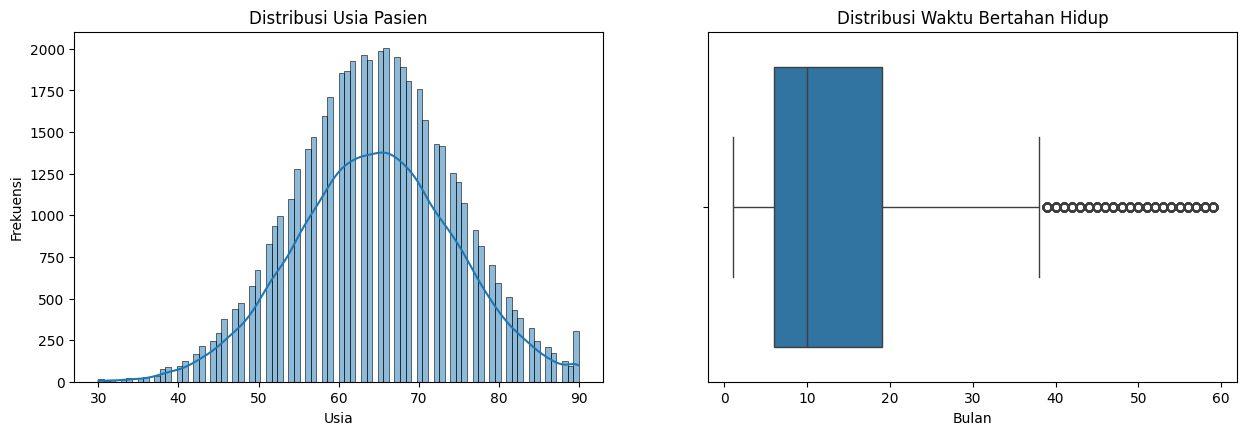

In [203]:
# 1. Analisis Distribusi Variabel Numerik
plt.figure(figsize=(15, 10))

# Histogram Usia
plt.subplot(2, 2, 1)
sns.histplot(df['Age'], kde=True)
plt.title('Distribusi Usia Pasien')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')

# Boxplot Waktu Bertahan Hidup
plt.subplot(2, 2, 2)
sns.boxplot(x=df['Survival_Time_Months'])
plt.title('Distribusi Waktu Bertahan Hidup')
plt.xlabel('Bulan')

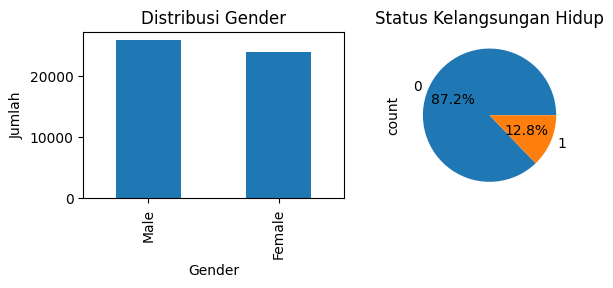

In [204]:
# 2. Analisis Kategoris
plt.subplot(2, 2, 3)
df['Gender'].value_counts().plot(kind='bar')
plt.title('Distribusi Gender')
plt.xlabel('Gender')
plt.ylabel('Jumlah')

plt.subplot(2, 2, 4)
df['Survival_Status'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Status Kelangsungan Hidup')

plt.tight_layout()
plt.show()



In [205]:
# 3. Statistik Deskriptif
print("Statistik Deskriptif Variabel Numerik:")
print(df[['Age', 'Survival_Time_Months']].describe())



Statistik Deskriptif Variabel Numerik:
                Age  Survival_Time_Months
count  50000.000000          50000.000000
mean      64.540940             13.898040
std        9.973847             11.272151
min       30.000000              1.000000
25%       58.000000              6.000000
50%       65.000000             10.000000
75%       71.000000             19.000000
max       90.000000             59.000000


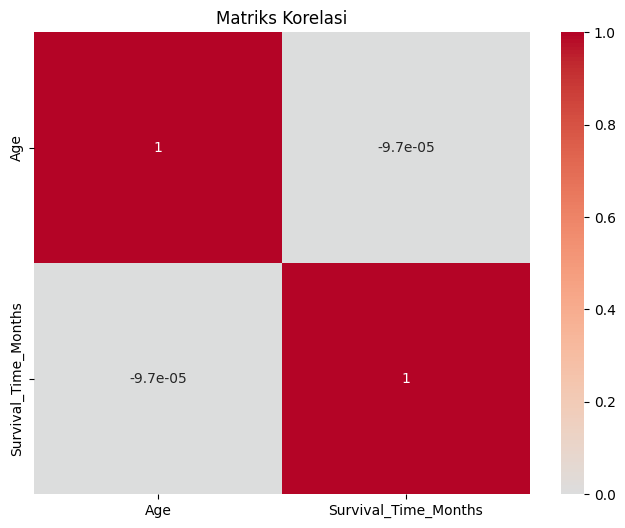

In [206]:
# 4. Korelasi
correlation_matrix = df[['Age', 'Survival_Time_Months']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriks Korelasi')
plt.show()



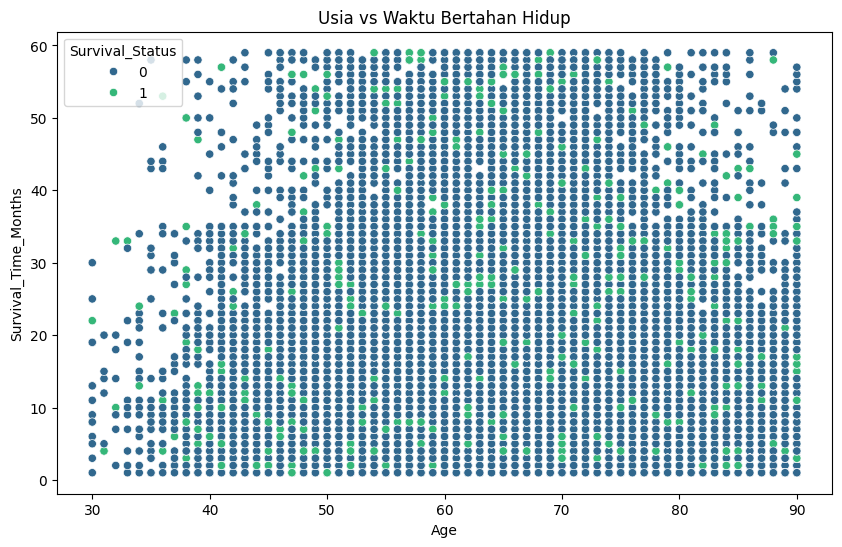

In [207]:
# 5. Scatter Plot Usia vs Waktu Bertahan Hidup
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Survival_Time_Months', hue='Survival_Status', palette='viridis')
plt.title('Usia vs Waktu Bertahan Hidup')
plt.show()



In [208]:
# 6. Analisis Gender terhadap Kelangsungan Hidup
survival_by_gender = df.groupby('Gender')['Survival_Status'].mean()
print("\nPersentase Kelangsungan Hidup berdasarkan Gender:")
print(survival_by_gender)


Persentase Kelangsungan Hidup berdasarkan Gender:
Gender
Female    0.127673
Male      0.129150
Name: Survival_Status, dtype: float64


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [209]:
# Menghapus duplikat
df = df.drop_duplicates()
print("\nSetelah Menghapus Duplikasi, Total Baris:", len(df))


Setelah Menghapus Duplikasi, Total Baris: 49996


In [210]:
# Penanganan Outlier menggunakan IQR
Q1 = df[['Age', 'Survival_Time_Months']].quantile(0.25)
Q3 = df[['Age', 'Survival_Time_Months']].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menghitung jumlah outlier sebelum dihapus
outliers_before = ((df[['Age', 'Survival_Time_Months']] < lower_bound) | (df[['Age', 'Survival_Time_Months']] > upper_bound)).sum().sum()

# Menyingkirkan outlier dengan benar
df = df.loc[
    ~((df['Age'] < lower_bound['Age']) | (df['Age'] > upper_bound['Age']) |
      (df['Survival_Time_Months'] < lower_bound['Survival_Time_Months']) |
      (df['Survival_Time_Months'] > upper_bound['Survival_Time_Months']))
]

# Menghitung jumlah outlier setelah dihapus
outliers_after = ((df[['Age', 'Survival_Time_Months']] < lower_bound) | (df[['Age', 'Survival_Time_Months']] > upper_bound)).sum().sum()

print(f"Jumlah outlier sebelum dihapus: {outliers_before}")
print(f"Jumlah outlier setelah dihapus: {outliers_after}")

Jumlah outlier sebelum dihapus: 2324
Jumlah outlier setelah dihapus: 0


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [211]:
# Memilih fitur yang relevan untuk clustering
features = ["Age", "Smoking_History", "Obesity", "Diabetes", "Chronic_Pancreatitis",
            "Family_History", "Hereditary_Condition", "Jaundice", "Abdominal_Discomfort",
            "Back_Pain", "Weight_Loss", "Development_of_Type2_Diabetes", "Alcohol_Consumption",
            "Physical_Activity_Level", "Diet_Processed_Food", "Access_to_Healthcare", "Urban_vs_Rural",
            "Economic_Status"]
data_selected = df[features]

# Encoding categorical variables
label_encoders = {}
for col in data_selected.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data_selected[col] = le.fit_transform(data_selected[col])
    label_encoders[col] = le

# Normalisasi fitur
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_selected)

<ipython-input-211-f13fee10b1b4>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_selected[col] = le.fit_transform(data_selected[col])
<ipython-input-211-f13fee10b1b4>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_selected[col] = le.fit_transform(data_selected[col])
<ipython-input-211-f13fee10b1b4>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

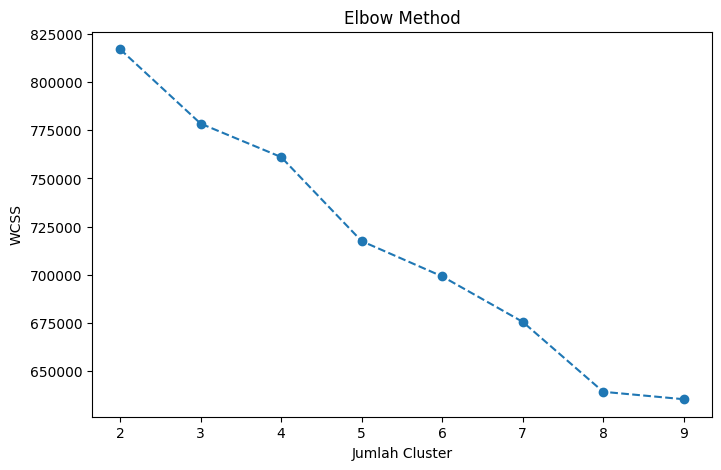

In [212]:
# Menentukan jumlah cluster optimal dengan Elbow Method
wcss = []
k_values = range(2, 10)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_values, wcss, marker='o', linestyle='--')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

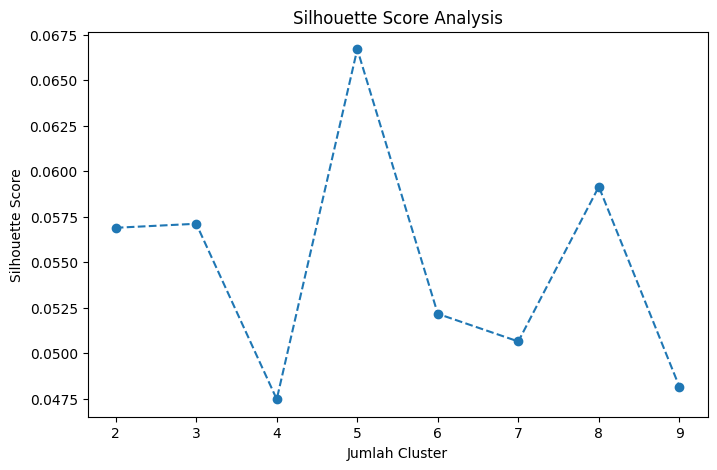

In [213]:
# Menentukan jumlah cluster optimal dengan Silhouette Score
silhouette_scores = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(data_scaled)
    silhouette_scores.append(silhouette_score(data_scaled, labels))

plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Analysis')
plt.show()

In [214]:
# Pilih jumlah cluster optimal (misalnya, berdasarkan grafik di atas)
optimal_k = 3  # Sesuaikan dengan hasil analisis
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df["Cluster"] = kmeans.fit_predict(data_scaled)

# Membagi data menjadi data latih dan data uji
X_train, X_test = train_test_split(df, test_size=0.2, random_state=42)

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [215]:
# Evaluasi clustering dengan Silhouette Score
final_score = silhouette_score(data_scaled, df["Cluster"])
print(f'Silhouette Score untuk {optimal_k} cluster: {final_score}')

Silhouette Score untuk 3 cluster: 0.0571135571666643


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [216]:
#Type your code here

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [217]:
#Type your code here

Tulis hasil interpretasinya di sini.
1. Cluster 1:
2. Cluster 2:
3. Cluster 3:

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.